# Geometric Transformation

Reference: https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html

#### OpenCV provides two transformation functions, `cv.warpAffine` and `cv.warpPerspective`, with which you can perform all kinds of transformations. `cv.warpAffine` takes a 2x3 transformation matrix while `cv.warpPerspective` takes a 3x3 transformation matrix as input.

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

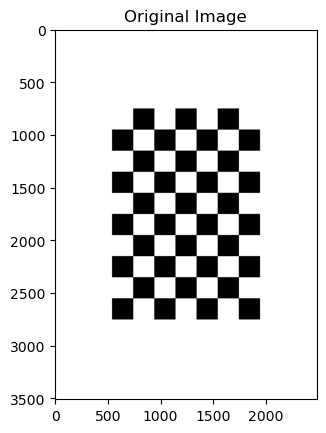

In [12]:
img = cv.imread('data/A4_Chessboard_9x6.png')
assert img is not None, "file could not be read, check with os.path.exists()"
plt.imshow(img)
plt.title('Original Image')

plt.show()

In [13]:
img.shape

(3508, 2480, 3)

## Perspective Transformation

For perspective transformation, we need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, we need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function `cv.getPerspectiveTransform`. Then apply `cv.warpPerspective` with this 3x3 transformation matrix.

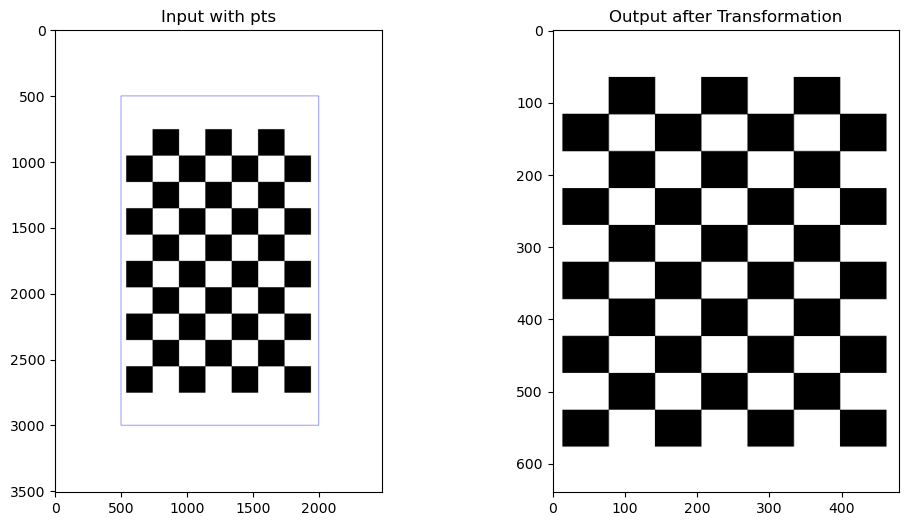

In [ ]:
pts_original = np.float32([[500, 500], [2000, 500], [2000, 3000], [500, 3000]]) 
# This is a set of four points in the original image (image) that represent a quadrilateral region that we want to transform. 


pts_transformed = np.float32([[0, 0], [480, 0], [480, 640], [0, 640]])
# This is another set of four points that define where you want the points to map in the transformed image (dst). 
# Essentially, this set describes the output quadrilateral (in this case, a 480x640 rectangle).

M = cv.getPerspectiveTransform(pts_original,pts_transformed)

dst = cv.warpPerspective(img,M,(480,640))       # (width, height of output image)
plt.figure(figsize=(12, 6)) 

# Draw points as a blue rectangle on the original image
image_with_rectangle = img.copy()
cv.polylines(image_with_rectangle, [np.int32(pts_original)], isClosed=True, color=(255, 0, 0), thickness=2)

plt.subplot(121), plt.imshow(cv.cvtColor(image_with_rectangle, cv.COLOR_BGR2RGB)), plt.title('Input with pts')
plt.subplot(122), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)), plt.title('Output after Transformation')
plt.show()

## Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then `cv.getAffineTransform` will create a 2x3 matrix which is to be passed to `cv.warpAffine`.

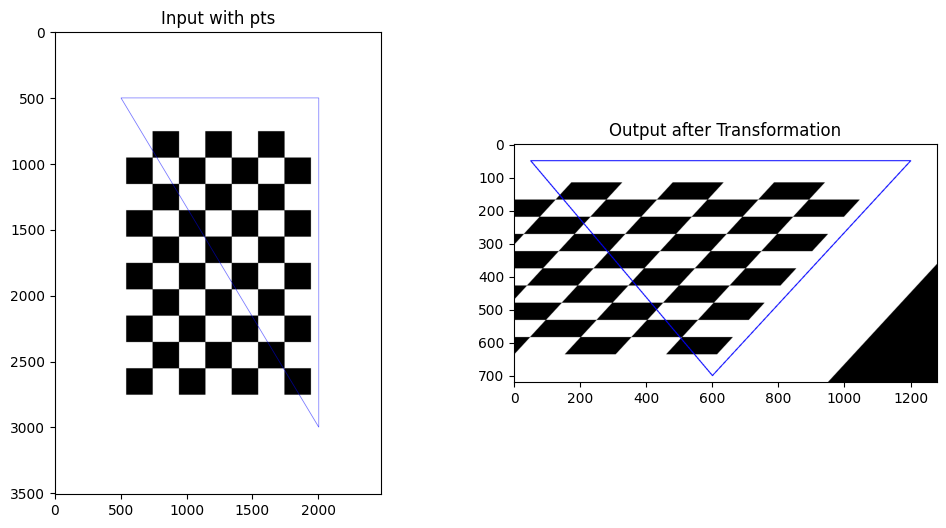

In [17]:
rows,cols,ch = img.shape        # h,w,c
 
pts_original = np.float32([[500, 500], [2000, 500], [2000, 3000]])
# pts_original contains three points from the input image that you want to transform.

pts_transformed = np.float32([[50, 50], [1200, 50], [600, 700]])
# pts_transformed contains the new locations of the points after the transformation.

M = cv.getAffineTransform(pts_original,pts_transformed)
# function computes a 2x3 affine transformation matrix, M, 
# which describes how to transform the three points in pts_original to their corresponding points in pts_transformed.

dst = cv.warpAffine(img,M,(1280,720))
plt.figure(figsize=(12, 6)) 

# Draw pts1 points as a blue rectangle on the original image
image_with_rectangle = img.copy()
cv.polylines(image_with_rectangle, [np.int32(pts_original)], isClosed=True, color=(255, 0, 0), thickness=2)

dst_with_rectangle = dst.copy()
cv.polylines(dst_with_rectangle, [np.int32(pts_transformed)], isClosed=True, color=(255, 0, 0), thickness=2)


plt.subplot(121), plt.imshow(cv.cvtColor(image_with_rectangle, cv.COLOR_BGR2RGB)), plt.title('Input with pts')
plt.subplot(122), plt.imshow(cv.cvtColor(dst_with_rectangle, cv.COLOR_BGR2RGB)), plt.title('Output after Transformation')
plt.show()

In [17]:
M

array([[   0.76666667,   -0.24      , -213.33333333],
       [   0.        ,    0.26      ,  -80.        ]])

## Resizing

cv.resize parameters:
- img            -> Input image to resize
- None           -> Output size (None means it will be computed from fx, fy)
- fx=2           -> Scale factor along the horizontal axis (2x width)
- fy=2           -> Scale factor along the vertical axis (2x height)
- interpolation  -> Interpolation method, INTER_CUBIC gives better quality for enlarging images

In [19]:
#Scaling by the factor of 2
print(img.shape)
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
print(res.shape)

(3508, 2480, 3)
(7016, 4960, 3)


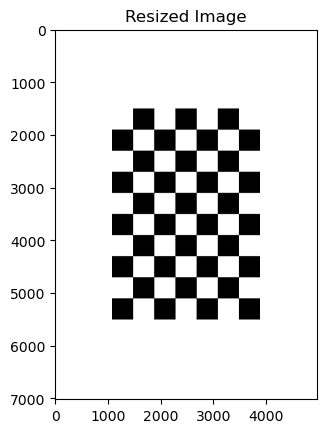

In [20]:
# Display the image using matplotlib
plt.imshow(res)
plt.title('Resized Image')
plt.show()

In [21]:
# Lets use the cv.resize function to resize the image by a factor of 1/2 in both dimensions without using the fx and fy parameters.
# This will reduce the size of the image to half its original dimensions.
h,w,c = img.shape
res = cv.resize(img,(w//2,h//2),interpolation = cv.INTER_CUBIC)
res.shape

(1754, 1240, 3)

## Translation

Translation is the shifting of an object's location. 
If we know the shift in the (x,y) direction say $$ (t_{x},t_{y}), $$ We can create the transformation matrix as follows:

$$
M = 
\begin{bmatrix}
1 & 0 & t_{x} \\
0 & 1 & t_{y}
\end{bmatrix}
$$

We can make it into a Numpy array of type np.float32 and pass it into the `cv.warpAffine()` function. See the below example for a shift of (300,400):

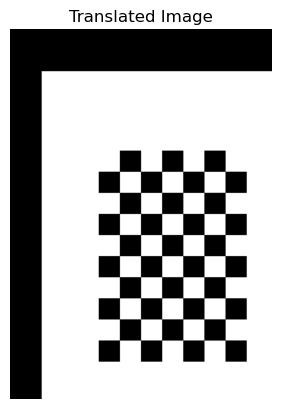

In [22]:
img = cv.imread('data/A4_Chessboard_9x6.png')
rows,cols,ch = img.shape
 
M = np.float32([[1,0,300],[0,1,400]])
dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.title('Translated Image')
plt.axis('off')  # Hide axes
plt.show()

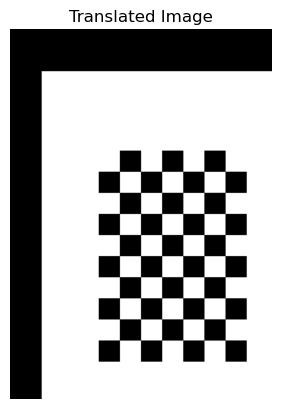

In [21]:

img = cv.imread('data/A4_Chessboard_9x6.png')
rows,cols,ch = img.shape
 
M = np.float32([[1,0,300],[0,1,400]])
dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.title('Translated Image')
plt.axis('off')  # Hide axes
plt.show()


## Rotation

Rotation of an image for an angle $\theta$ is achieved by the transformation matrix of the form
$$
M = \begin{bmatrix}
\cos\theta & -\sin\theta\\[6pt]
\sin\theta & \cos\theta
\end{bmatrix}
$$

But OpenCV provides scaled rotation with adjustable center of rotation, $c=(c_x,c_y)$ so that you can rotate at any location you prefer. The modified transformation matrix is given by

$$
T =
\begin{bmatrix}
\alpha & \beta & (1-\alpha)\,c_x - \beta\,c_y\\[6pt]
-\beta & \alpha & \beta\,c_x + (1-\alpha)\,c_y
\end{bmatrix},
\qquad
\alpha = \text{scale}\cdot\cos\theta,\ \ \beta = \text{scale}\cdot\sin\theta
$$


To find this transformation matrix, OpenCV provides a function, `cv2.getRotationMatrix2D(center, angle, scale)`.

[[ 1.41421356e+00  1.41421356e+00 -2.99324119e+03]
 [-1.41421356e+00  1.41421356e+00  1.02659423e+03]]


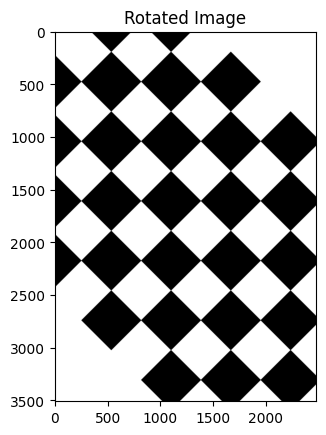

In [ ]:
# Check out the below example which rotates the image by 45 degree with respect to center with an scaling factor of 2.

rows,cols,ch = img.shape
 
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,2)        # center, angle, scale

print(M) # Display the rotation matrix 
# M is a 2x3 matrix that combines rotation and scaling transformations.

dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.show()

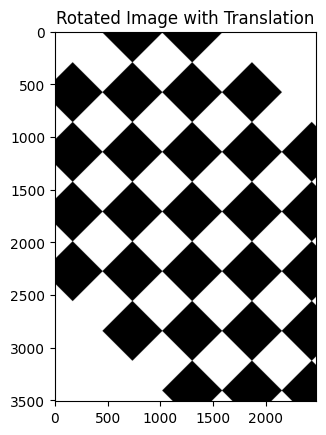

In [36]:
# if i also want to translate the image after rotation, I can modify the translation components of the rotation matrix M.
# For example, to translate the image by (tx, ty) = (100, 50) after rotation, I can do the following:
M[0, 2] += 100  # Modify the translation component in the x direction
M[1, 2] += 50   # Modify the translation component in the y direction

dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.title('Rotated Image with Translation')
plt.show()

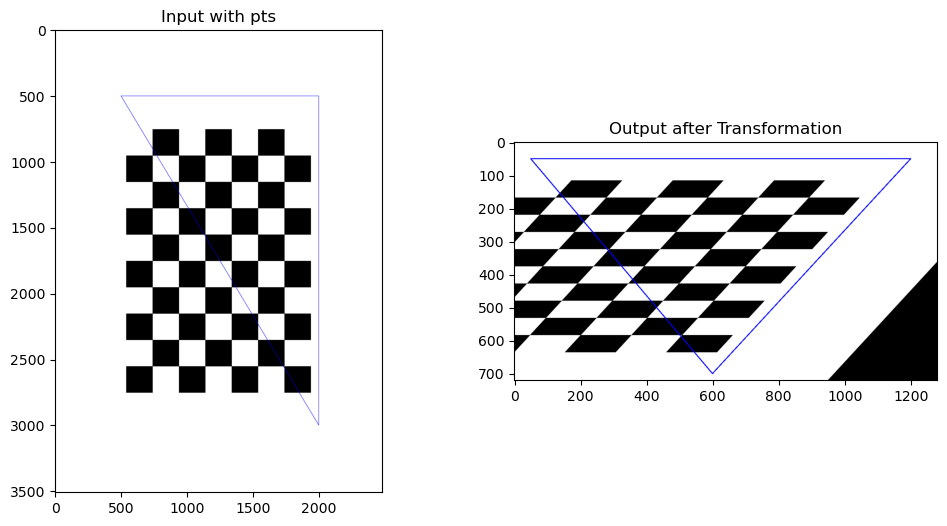

In [16]:
img = cv.imread('data/A4_Chessboard_9x6.png')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape        # h,w,c
 
pts_original = np.float32([[500, 500], [2000, 500], [2000, 3000]])
# pts_original contains three points from the input image that you want to transform.

pts_transformed = np.float32([[50, 50], [1200, 50], [600, 700]])
# pts_transformed contains the new locations of the points after the transformation.

M = cv.getAffineTransform(pts_original,pts_transformed)
# function computes a 2x3 affine transformation matrix, M, 
# which describes how to transform the three points in pts_original to their corresponding points in pts_transformed.

dst = cv.warpAffine(img,M,(1280,720))
plt.figure(figsize=(12, 6)) 

# Draw pts1 points as a blue rectangle on the original image
image_with_rectangle = img.copy()
cv.polylines(image_with_rectangle, [np.int32(pts_original)], isClosed=True, color=(255, 0, 0), thickness=2)

dst_with_rectangle = dst.copy()
cv.polylines(dst_with_rectangle, [np.int32(pts_transformed)], isClosed=True, color=(255, 0, 0), thickness=2)

plt.subplot(121), plt.imshow(cv.cvtColor(image_with_rectangle, cv.COLOR_BGR2RGB)), plt.title('Input with pts')
plt.subplot(122), plt.imshow(cv.cvtColor(dst_with_rectangle, cv.COLOR_BGR2RGB)), plt.title('Output after Transformation')
plt.show()
